In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Convolution2D, Dropout, MaxPooling2D
from keras.models import Sequential


In [10]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


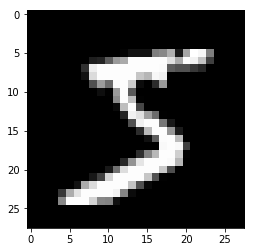

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [12]:
X_train = x_train.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [13]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(Y_train.shape, Y_test.shape)

(60000, 10) (10000, 10)


In [14]:
X_train = X_train[:3600]
Y_train = Y_train[:3600]

X_test = X_test[:900]
Y_test = Y_test[:900]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3600, 28, 28, 1) (900, 28, 28, 1)
(3600, 10) (900, 10)


In [15]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
#(26, 26, 32)

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#(24, 24, 64)

model.add(MaxPooling2D(pool_size=(2,2)))
#(12, 12, 64)

model.add(Convolution2D(16, 3, 3))
model.add(Activation('relu'))
#(10, 10, 16)

model.add(Flatten())
#(1600)

model.add(Dropout(0.25))

model.add(Dense(10)) # num classes = 10
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 16)        0         
__________

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  


In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
         nb_epoch=12, 
         batch_size=16,
         verbose=2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 3600 samples, validate on 900 samples
Epoch 1/12
 - 14s - loss: 3.4840 - acc: 0.5944 - val_loss: 0.3452 - val_acc: 0.8900
Epoch 2/12
 - 13s - loss: 0.2872 - acc: 0.9139 - val_loss: 0.2011 - val_acc: 0.9289
Epoch 3/12
 - 15s - loss: 0.1394 - acc: 0.9594 - val_loss: 0.1470 - val_acc: 0.9544
Epoch 4/12
 - 15s - loss: 0.1058 - acc: 0.9636 - val_loss: 0.1176 - val_acc: 0.9600
Epoch 5/12
 - 14s - loss: 0.0867 - acc: 0.9703 - val_loss: 0.1355 - val_acc: 0.9544
Epoch 6/12
 - 14s - loss: 0.0675 - acc: 0.9772 - val_loss: 0.1449 - val_acc: 0.9544
Epoch 7/12
 - 13s - loss: 0.0634 - acc: 0.9781 - val_loss: 0.1179 - val_acc: 0.9667
Epoch 8/12
 - 17s - loss: 0.0552 - acc: 0.9828 - val_loss: 0.1494 - val_acc: 0.9611
Epoch 9/12
 - 16s - loss: 0.0450 - acc: 0.9853 - val_loss: 0.1019 - val_acc: 0.9700
Epoch 10/12
 - 14s - loss: 0.0407 - acc: 0.9872 - val_loss: 0.1272 - val_acc: 0.9611
Epoch 11/12
 - 13s - loss: 0.0428 - acc: 0.9853 - val_loss: 0.1973 - val_acc: 0.9467
Epoch 12/12
 - 14s - loss: 